In [47]:
f = open('b1024_gpu_dataloaders28_gpu_time.log','r')

In [48]:
gpu_times = []
for line in f.readlines():
    try:
        time = float(line.split(': ')[-1].split(' ms')[0])
        gpu_times.append(time)
    except Exception as e:
        print(e)
        print(line)

In [49]:
gpu_times

[1.3719040155410767,
 0.004095999989658594,
 0.005119999870657921,
 0.004095999989658594,
 0.004095999989658594,
 0.004095999989658594,
 0.004095999989658594,
 0.005119999870657921,
 0.004095999989658594,
 0.004095999989658594,
 0.804256021976471,
 0.004095999989658594,
 0.004095999989658594,
 0.006144000217318535,
 0.004095999989658594,
 0.004095999989658594,
 0.004095999989658594,
 0.004095999989658594,
 0.005119999870657921,
 0.004095999989658594,
 0.8919680118560791,
 0.004095999989658594,
 0.006144000217318535,
 0.006144000217318535,
 0.004095999989658594,
 0.0030720001086592674,
 0.005119999870657921,
 19481.1953125,
 0.005119999870657921,
 0.0030720001086592674,
 0.7922559976577759,
 0.006144000217318535,
 0.0030720001086592674,
 0.004095999989658594,
 0.004095999989658594,
 0.005119999870657921,
 0.005119999870657921,
 0.005119999870657921,
 0.005119999870657921,
 0.006144000217318535,
 0.8632000088691711,
 0.006144000217318535,
 0.004095999989658594,
 0.005119999870657921,
 14

In [50]:
print(f'avg idle gpu time: {sum(gpu_times)/len(gpu_times)} ms')
print(f'max idle gpu time: {max(gpu_times)/1000} ms')
print(f'min idle gpu time: {min(gpu_times)} ms')
print(f'90th idle gpu time: {sorted(gpu_times)[int(len(gpu_times)*0.90)]} ms')
print(f'E2E idle gpu time: {sum(gpu_times)/1000} s')

avg idle gpu time: 1392.4528403239628 ms
max idle gpu time: 49.803125 ms
min idle gpu time: 0.002047999994829297 ms
90th idle gpu time: 0.9233919978141785 ms
E2E idle gpu time: 1741.9585032452776 s


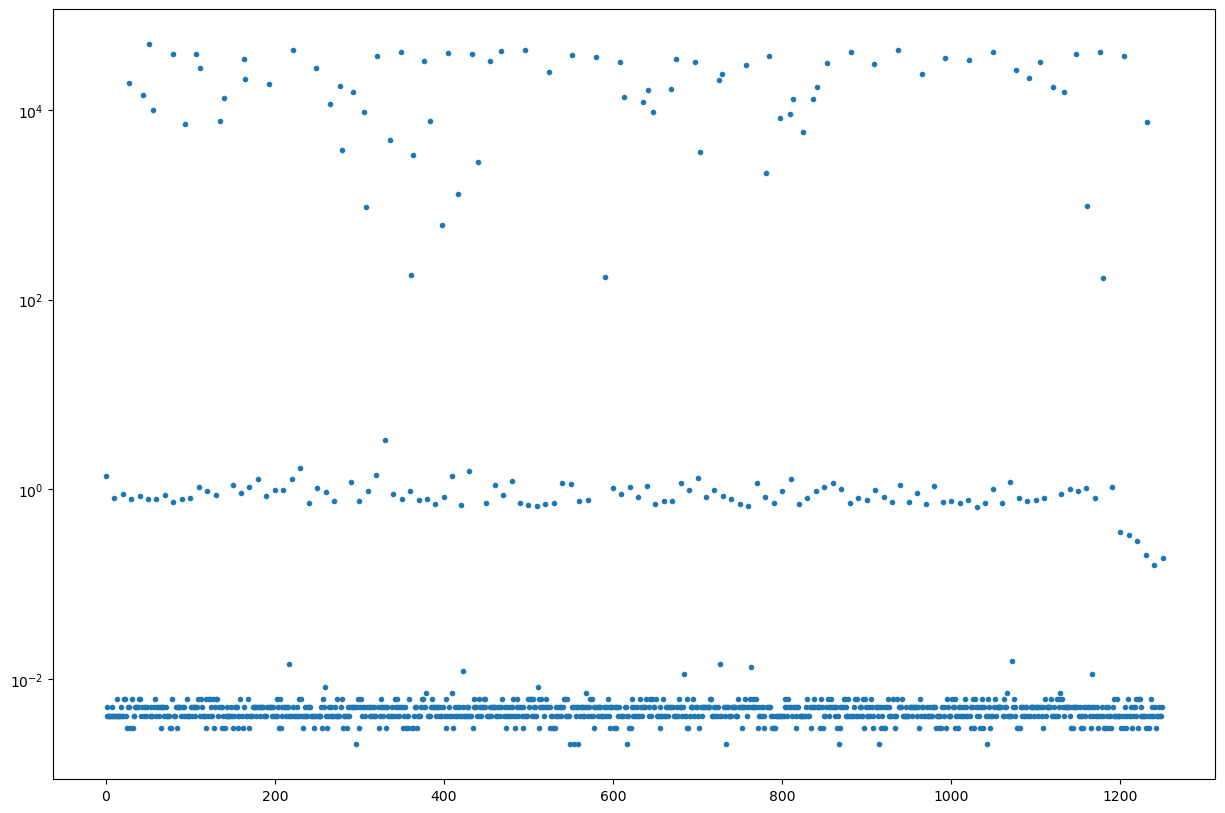

In [51]:
# plot gpu_times
import matplotlib.pyplot as plt

# set figure size
plt.figure(figsize=(15,10))
# plot as line plot
plt.plot(gpu_times, '.')
# logscale
plt.yscale('log')

In [52]:
import os, pandas as pd

In [53]:
p3torch_logs_root_dir = "/mydata/pytorch_custom_log_and_vtune_one_epoch_imagenet_dataset/"

In [57]:
# loop recursively through all files in the root directory
for root, dirs, files in os.walk(p3torch_logs_root_dir):
    print(root)

    # diff for each file
    diffs = []
    
    for file in files:
        if 'main' in file:
            continue
        
        # read as csv
        df = pd.read_csv(os.path.join(root, file))
        # give column names
        df.columns = ['event', 'start_ts', 'duration']
        
        # keep lines with 'SBatchPreprocessed_' in event
        df = df[df['event'].str.contains('SBatchPreprocessed_')]
        # map event column values from SBatchPreprocessed_idx to idx
        df['event'] = df['event'].map(lambda x: int(x.split('_')[-1]))
        
        # sort by event
        df = df.sort_values(by='event')
        # subtract start_ts + duration from start_ts of the subsequent event
        df['diff'] = (df['start_ts'].shift(-1) - (df['start_ts'] + df['duration']))/1000000
        
        # drop last row
        df = df.drop(df.tail(1).index)
        
        # sum up the diffs
        # print(f'{file}: {df["diff"].sum()} ms')
        # store the sum for each file
        diffs.append(df["diff"].sum())
        
    total_dataloader_idle_time = sum(diffs)
    print(f'total_dataloader_idle_time: {total_dataloader_idle_time/1000} s')

/mydata/pytorch_custom_log_and_vtune_one_epoch_imagenet_dataset/b1024_gpu4_dataloader28/
custom_log_worker_pid_107963: 70774.71078400001 ms
custom_log_worker_pid_108590: 72724.16307200001 ms
custom_log_worker_pid_108491: 57679.957248 ms
custom_log_worker_pid_108227: 62863.455232000015 ms
custom_log_worker_pid_108029: 62630.14528 ms
custom_log_worker_pid_108392: 63074.387712 ms
custom_log_worker_pid_107833: 48924.363264 ms
custom_log_worker_pid_108194: 66550.385664 ms
custom_log_worker_pid_108524: 74731.120896 ms
custom_log_worker_pid_108557: 64244.283903999996 ms
custom_log_worker_pid_107899: 60647.41350400001 ms
custom_log_worker_pid_108128: 64769.17555199999 ms
custom_log_worker_pid_108062: 52214.031871999985 ms
custom_log_worker_pid_107866: 59127.234816 ms
custom_log_worker_pid_108425: 69685.28128 ms
custom_log_worker_pid_107766: 56386.77503999999 ms
custom_log_worker_pid_107996: 54194.40179199999 ms
custom_log_worker_pid_108095: 45483.467008 ms
custom_log_worker_pid_108656: 72308.4